In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import multivariate_normal

# # Define the parameters for the image plane and AoIs
# image_height = 480  # Height of the image
# image_width = 640   # Width of the image
# num_points = 100    # Number of points to generate around each AoI

# # AoIs defined as tuples of (center_x, center_y, spread)
# AoIs = {
#     'pick_1': (100, 150, 20),
#     'place_1': (300, 150, 20),
#     'pick_2': (500, 300, 20),
#     'place_2': (200, 300, 20)
# }

# # Function to generate random points around a center (x, y) with a given spread
# def generate_points(center_x, center_y, spread, num_points):
#     x_points = np.random.normal(loc=center_x, scale=spread, size=num_points)
#     y_points = np.random.normal(loc=center_y, scale=spread, size=num_points)
#     return x_points, y_points

# # Container for all points
# all_x_points = []
# all_y_points = []

# # Generate points for each AoI in sequence
# for AoI, (x, y, spread) in AoIs.items():
#     x_points, y_points = generate_points(x, y, spread, num_points)
#     all_x_points.extend(x_points)
#     all_y_points.extend(y_points)

# # Calculate likelihoods
# def calculate_likelihoods(gaze_points, AoIs):
#     likelihoods = {}
#     for AoI, (x, y, spread) in AoIs.items():
#         mvn = multivariate_normal(mean=[x, y], cov=[[spread**2, 0], [0, spread**2]])
#         likelihoods[AoI] = mvn.pdf(gaze_points)
#     return likelihoods

# # Pack all gaze points into an array
# gaze_points = np.column_stack((all_x_points, all_y_points))

# # Get the likelihoods for each point to each AoI
# likelihoods = calculate_likelihoods(gaze_points, AoIs)

# # Visualize the likelihoods for one AoI
# plt.figure(figsize=(8, 6))
# plt.scatter(all_x_points, all_y_points, c=likelihoods['pick_1'], cmap='viridis', label='Gaze Points Likelihood')
# plt.colorbar(label='Likelihood to pick_1')
# plt.scatter([x for x, y, s in AoIs.values()], [y for x, y, s in AoIs.values()], color='red', s=100, edgecolors='black', label='AoI Centers')
# plt.xlim(0, image_width)
# plt.ylim(0, image_height)
# plt.gca().invert_yaxis()
# plt.title('Gaze Points Likelihood Relative to pick_1')
# plt.xlabel('Width')
# plt.ylabel('Height')
# plt.grid(True)
# plt.legend()
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters for the image plane and AoIs
image_height = 480
image_width = 640
num_points_per_AoI = 50  # Number of points to generate around each AoI per time step

# AoIs defined as tuples of (center_x, center_y, spread)
AoIs = {
    'pick_1': (100, 150, 20),
    'place_1': (300, 150, 20),
    'pick_2': (500, 300, 20),
    'place_2': (200, 300, 20)
}

# Generate random points around each AoI in a sequence, mimicking time steps
def generate_time_stepped_points(AoIs, num_points):
    points_by_time = []
    for AoI, (x, y, spread) in AoIs.items():
        x_points = np.random.normal(loc=x, scale=spread, size=num_points)
        y_points = np.random.normal(loc=y, scale=spread, size=num_points)
        points_by_time.append(np.column_stack((x_points, y_points)))
    return points_by_time

# Generate points for each time step
time_stepped_points = generate_time_stepped_points(AoIs, num_points_per_AoI)

# Calculate likelihoods for each point relative to each AoI
def calculate_likelihoods(points, AoIs):
    likelihoods = []
    for point_set in points:
        # Calculate likelihood for each AoI and each point
        likelihoods_set = {AoI: multivariate_normal(mean=[x, y], cov=[[spread**2, 0], [0, spread**2]]).pdf(point_set) for AoI, (x, y, spread) in AoIs.items()}
        # Normalize the likelihoods so they sum to 1 across AoIs for each point
        total_likelihood = np.sum([likelihoods_set[AoI] for AoI in AoIs], axis=0)
        normalized_likelihoods_set = {AoI: likelihoods_set[AoI] / total_likelihood for AoI in AoIs}
        likelihoods.append(normalized_likelihoods_set)
    return likelihoods

# Get the likelihoods for each point to each AoI over time, normalized
time_stepped_likelihoods = calculate_likelihoods(time_stepped_points, AoIs)

# Example to print normalized likelihoods for the first time step
print("Normalized Likelihoods at first time step:")
for AoI, likelihoods in time_stepped_likelihoods[0].items():
    print(f"{AoI}: {likelihoods[:5]}")  # Print only the first 5 likelihoods for brevity

print(likelihoods.shape)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Sample data generation - replace this with your actual likelihood data
# # Assuming there are 50 time steps and the likelihoods for each AoI were already normalized as shown above
# num_time_steps = 50
# # Generate random likelihoods for the sake of demonstration
# np.random.seed(0)  # For reproducibility
# time_stepped_likelihoods = [{
#     'pick_1': np.random.rand() * np.exp(-0.1 * t),
#     'place_1': np.random.rand() * np.exp(-0.05 * t),
#     'pick_2': np.random.rand() * np.exp(-0.08 * t),
#     'place_2': np.random.rand() * np.exp(-0.02 * t)
# } for t in range(num_time_steps)]

# # Prepare data for plotting
# times = list(range(num_time_steps))
# pick_1_likelihoods = [likelihoods['pick_1'] for likelihoods in time_stepped_likelihoods]
# place_1_likelihoods = [likelihoods['place_1'] for likelihoods in time_stepped_likelihoods]
# pick_2_likelihoods = [likelihoods['pick_2'] for likelihoods in time_stepped_likelihoods]
# place_2_likelihoods = [likelihoods['place_2'] for likelihoods in time_stepped_likelihoods]

# # Plotting the likelihoods over time
# plt.figure(figsize=(10, 6))
# plt.plot(times, pick_1_likelihoods, label='Likelihood for Pick_1', marker='o')
# plt.plot(times, place_1_likelihoods, label='Likelihood for Place_1', marker='o')
# plt.plot(times, pick_2_likelihoods, label='Likelihood for Pick_2', marker='o')
# plt.plot(times, place_2_likelihoods, label='Likelihood for Place_2', marker='o')

# plt.xlabel('Time Step')
# plt.ylabel('Likelihood')
# plt.title('Likelihood for Each AoI Over Time')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to extract and prepare likelihood data for plotting
def prepare_likelihood_data(time_stepped_likelihoods, AoIs):
    # Initialize dictionary to store lists of likelihoods for each AoI
    plot_data = {AoI: [] for AoI in AoIs}
    
    # Gather likelihoods for each AoI across all time steps
    for time_step in time_stepped_likelihoods:
        for AoI in AoIs:
            plot_data[AoI].append(np.mean(time_step[AoI]))
    
    return plot_data

# Prepare the data for plotting
likelihood_data = prepare_likelihood_data(time_stepped_likelihoods, AoIs)

# Extract time steps for the x-axis
time_steps = np.arange(len(time_stepped_likelihoods))

# Plotting the likelihoods for each AoI
plt.figure(figsize=(12, 8))
for AoI, data in likelihood_data.items():
    plt.plot(time_steps, data, label=f'Likelihood of {AoI}', marker='o')

plt.xlabel('Time Step')
plt.ylabel('Average Likelihood')
plt.title('Normalized Likelihood of Each AoI Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define parameters for the image plane and AoIs
image_height = 480
image_width = 640
num_points_per_AoI = 50  # Number of points to generate around each AoI per time step

# AoIs defined as tuples of (center_x, center_y, spread)
AoIs = {
    'pick_1': (100, 150, 20),
    'place_1': (300, 150, 20),
    'pick_2': (500, 300, 20),
    'place_2': (200, 300, 20)
}

# Generate random points around each AoI in a sequence, mimicking time steps
def generate_time_stepped_points(AoIs, num_points):
    points_by_time = []
    for AoI, (x, y, spread) in AoIs.items():
        x_points = np.random.normal(loc=x, scale=spread, size=num_points)
        y_points = np.random.normal(loc=y, scale=spread, size=num_points)
        points_by_time.append(np.column_stack((x_points, y_points)))
    return points_by_time

# Generate points for each time step
time_stepped_points = generate_time_stepped_points(AoIs, num_points_per_AoI)

# Calculate likelihoods for each point relative to each AoI
def calculate_likelihoods(points, AoIs):
    likelihoods = []
    for point_set in points:
        # Calculate likelihood for each AoI and each point
        likelihoods_set = {AoI: multivariate_normal(mean=[x, y], cov=[[spread**2, 0], [0, spread**2]]).pdf(point_set) for AoI, (x, y, spread) in AoIs.items()}
        # Normalize the likelihoods so they sum to 1 across AoIs for each point
        total_likelihood = np.sum([likelihoods_set[AoI] for AoI in AoIs], axis=0)
        normalized_likelihoods_set = {AoI: likelihoods_set[AoI] / total_likelihood for AoI in AoIs}
        likelihoods.append(normalized_likelihoods_set)
    return likelihoods

# Get the likelihoods for each point to each AoI over time, normalized
time_stepped_likelihoods = calculate_likelihoods(time_stepped_points, AoIs)

# Plotting AoI centers with labels
plt.figure(figsize=(10, 8))
for AoI, (x, y, spread) in AoIs.items():
    plt.scatter(x, y, color='red', s=100, edgecolors='black', label=f'{AoI} center')

plt.xlim(0, image_width)
plt.ylim(0, image_height)
plt.gca().invert_yaxis()
plt.title('AoI Centers on Image Plane')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


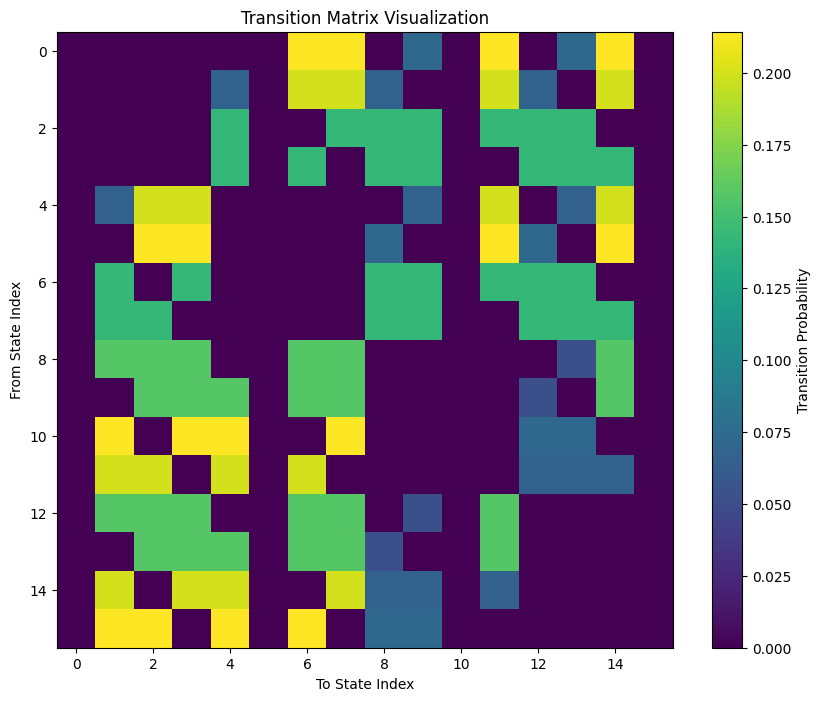

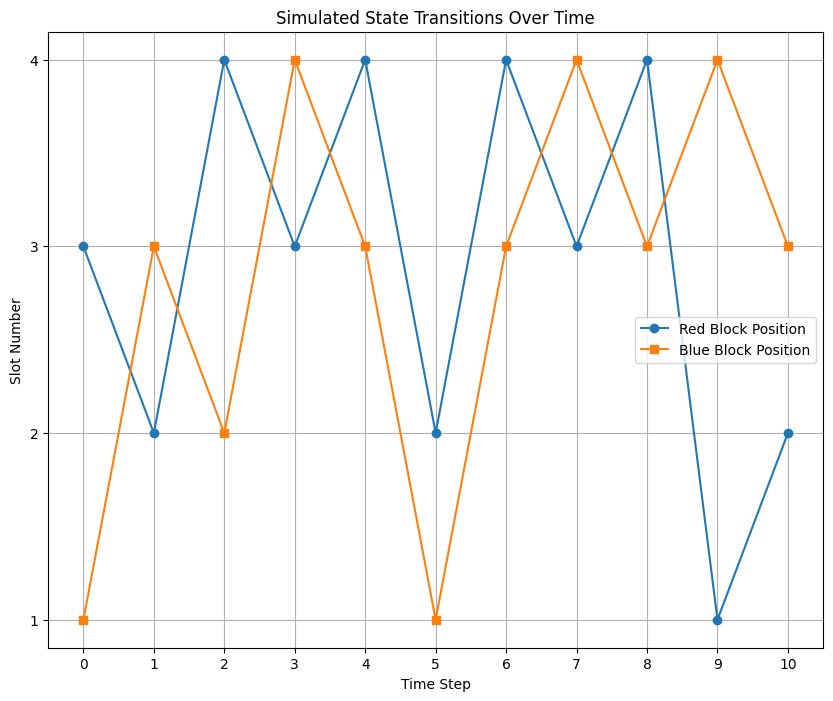

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def state_to_index(r, b):
    """ Convert state [r, b] to an index in the transition matrix. """
    return (r - 1) * 4 + (b - 1)

def index_to_state(index):
    """ Convert an index in the transition matrix back to a state [r, b]. """
    r = index // 4 + 1
    b = index % 4 + 1
    return r, b

def initialize_transition_matrix():
    """ Initialize the transition matrix for the blocks problem with new priors. """
    matrix_size = 16  # since there are 4*4 possible states
    transition_matrix = np.zeros((matrix_size, matrix_size))
    
    for r1 in range(1, 5):
        for b1 in range(1, 5):
            idx_from = state_to_index(r1, b1)
            for r2 in range(1, 5):
                for b2 in range(1, 5):
                    if r2 != b2:  # Ensure no two blocks in the same slot
                        idx_to = state_to_index(r2, b2)
                        if r1 != r2 and b1 != b2:  # Blocks cannot stay in the same position
                            # Increase probability if moving to 'preferred' slots
                            if (r1 in {3, 4} and r2 in {1, 2}) or (b1 in {1, 2} and b2 in {3, 4}):
                                transition_matrix[idx_from, idx_to] = 3
                            else:
                                transition_matrix[idx_from, idx_to] = 1

    # Normalize each row to sum to 1
    transition_matrix /= transition_matrix.sum(axis=1)[:, np.newaxis]
    
    return transition_matrix

def simulate_transitions(transition_matrix, start_state, num_steps=10):
    """ Simulate transitions based on the transition matrix. """
    current_index = state_to_index(*start_state)
    states = [start_state]
    for _ in range(num_steps):
        current_index = np.random.choice(range(16), p=transition_matrix[current_index])
        states.append(index_to_state(current_index))
    return states

# Initialize the transition matrix with the default settings
transition_matrix = initialize_transition_matrix()

# Simulate transitions from a starting state [3, 1] over 10 steps
simulated_states = simulate_transitions(transition_matrix, (3, 1), 10)

# Plot the transition matrix
plt.figure(figsize=(10, 8))
plt.imshow(transition_matrix, cmap='viridis', interpolation='none')
plt.colorbar(label='Transition Probability')
plt.title('Transition Matrix Visualization')
plt.xlabel('To State Index')
plt.ylabel('From State Index')
plt.grid(False)
plt.show()

# Plot the path of states
states_x, states_y = zip(*simulated_states)
plt.figure(figsize=(10, 8))
plt.plot(states_x, 'o-', label='Red Block Position')
plt.plot(states_y, 's-', label='Blue Block Position')
plt.xticks(ticks=range(len(states_x)), labels=range(len(states_x)))
plt.yticks(ticks=range(1, 5), labels=range(1, 5))
plt.xlabel('Time Step')
plt.ylabel('Slot Number')
plt.title('Simulated State Transitions Over Time')
plt.legend()
plt.grid(True)
plt.show()
